## Regresión lineal


In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Regresión lineal simple

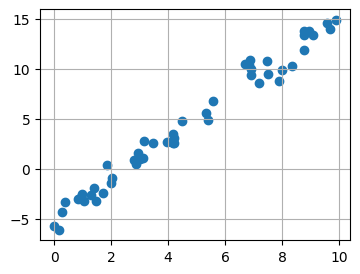

In [115]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)


fig, ax = plt.subplots(figsize = (4,3))
ax.scatter(x, y)
ax.grid(True,'both')
plt.show()

In [116]:
# Dado que x puede recibir una matriz, debemos especificar que se trata de un vector
x = x.reshape((len(x),1))
x[:5]

array([[4.17022005e+00],
       [7.20324493e+00],
       [1.14374817e-03],
       [3.02332573e+00],
       [1.46755891e+00]])

In [117]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept= True)

model.fit(x,y)

LinearRegression()

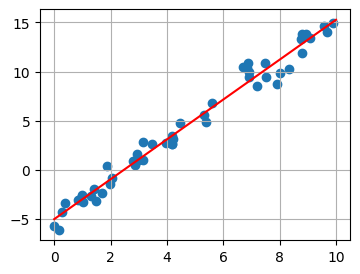

In [118]:
xfit = np.linspace(0,10,1000)
yfit = model.predict(xfit.reshape(len(xfit),1))

fig, ax = plt.subplots(figsize = (4,3))

ax.scatter(x,y)
ax.plot(xfit,yfit, color = 'r')
ax.grid(True, 'both')
plt.show()

In [119]:
print(f'Pendiente del modelo: {model.coef_[0]}')
print(f'Intercepto del modelo: {model.intercept_}')

Pendiente del modelo: 2.0272088103606944
Intercepto del modelo: -4.9985770855532


### Regresión lineal múltiple

In [120]:
X = 10 * rng.rand(100, 2)
y = 0.5 + np.dot(X, [1.5, -2.]) # coeficientes beta

y[:5],X[:5]

(array([  0.55256872, -13.61925846,  -6.65234788,   8.68745214,
          0.27398227]),
 array([[9.32595463, 6.96818161],
        [0.66000173, 7.55463053],
        [7.53876188, 9.23024536],
        [7.11524759, 1.24270962],
        [0.19880134, 0.26210987]]))

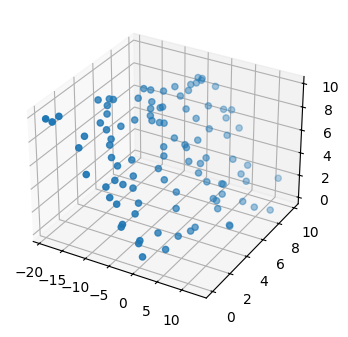

In [121]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y, X[:, 0], X[:, 1])
plt.show()

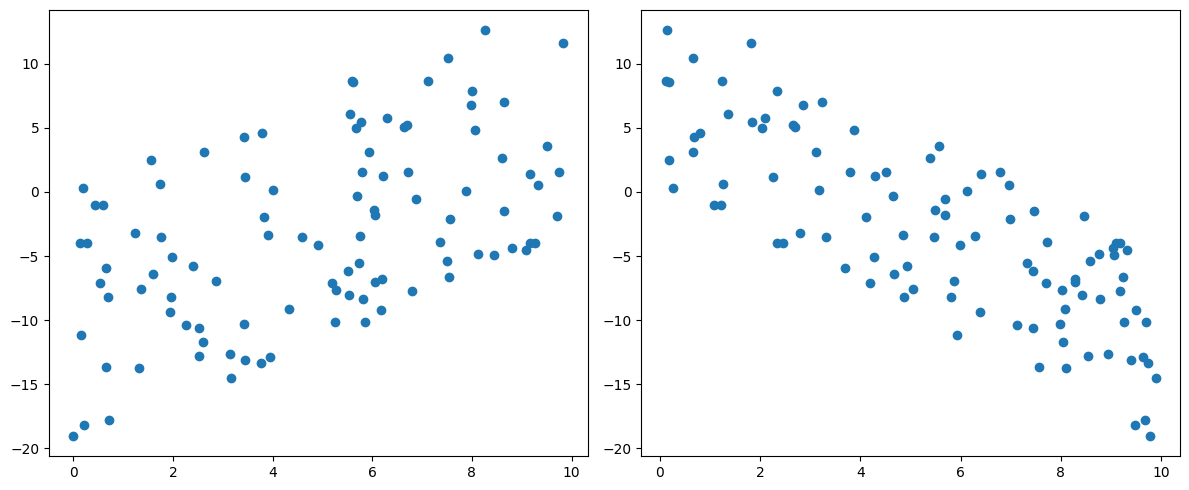

In [122]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

axes[0].scatter(X[:, 0], y)
axes[1].scatter(X[:, 1], y)
plt.tight_layout()
plt.show()

In [123]:
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.4999999999999978
[ 1.5 -2. ]


## Regresión de la función base

In [124]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [125]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

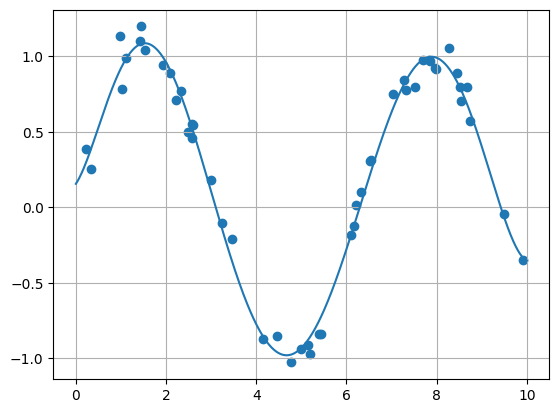

In [126]:
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.grid(True, 'both')
plt.plot(xfit, yfit);

### Ejemplo práctico: precios de casas en Bogotá

Este conjunto de datos contiene información sobre inmuebles en Bogotá, Colombia, incluyendo el tipo de propiedad, descripción, cantidad de habitaciones y baños, área, barrio, UPZ (Unidad de Planeamiento Zonal) y valor. Específicamente, las variables o características incluidas son:

- Tipo: El tipo de propiedad, que puede ser apartamento, casa, oficina, local, lote, bodega, etc.
- Descripción: Una breve descripción del inmueble.
- Habitaciones: La cantidad de habitaciones en el inmueble.
- Baños: La cantidad de baños en el inmueble.
- Área: El tamaño del área en metros cuadrados del inmueble.
- Barrio: El nombre del barrio donde se encuentra el inmueble.
- UPZ: La Unidad de Planeamiento Zonal donde se encuentra el inmueble.
- Valor: El valor del inmueble en pesos colombianos.

Este conjunto de datos podría ser útil para analizar el mercado inmobiliario en Bogotá, explorando los precios y características de diferentes tipos de propiedades en diferentes barrios y zonas de la ciudad. También podría ser útil para desarrollar modelos de predicción de precios o para identificar patrones y tendencias en el mercado inmobiliario.

Fuente: https://www.kaggle.com/datasets/pablobravo73/real-estate-bogota/data

In [127]:
import pandas as pd

url = 'https://raw.githubusercontent.com/julihdez36/Metodos_estadisticos/refs/heads/main/Data%20sets/inmuebles_bogota.csv'

df = pd.read_csv(url)

In [128]:
df.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [129]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


((9520, 8), None)

In [130]:
df.isna().sum()

Tipo             0
Descripcion      0
Habitaciones     0
Baños            0
Área             0
Barrio           0
UPZ             42
Valor            0
dtype: int64

In [131]:
df.dropna(inplace=True)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9478 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9478 non-null   object
 1   Descripcion   9478 non-null   object
 2   Habitaciones  9478 non-null   int64 
 3   Baños         9478 non-null   int64 
 4   Área          9478 non-null   int64 
 5   Barrio        9478 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9478 non-null   object
dtypes: int64(3), object(5)
memory usage: 666.4+ KB


In [133]:
df["Valor"] = df["Valor"].str.replace(r"[\$,.]", "", regex=True).astype(float)

In [134]:
df.Tipo.value_counts()

Tipo
Apartamento            7294
Casa                   2034
Oficina/Consultorio      60
Local                    38
Edificio                 22
Bodega                   13
Finca                    11
Lote                      6
Name: count, dtype: int64

C:\Users\Julian\AppData\Local\Temp\ipykernel_12156\288199535.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df["Tipo"], palette="viridis")


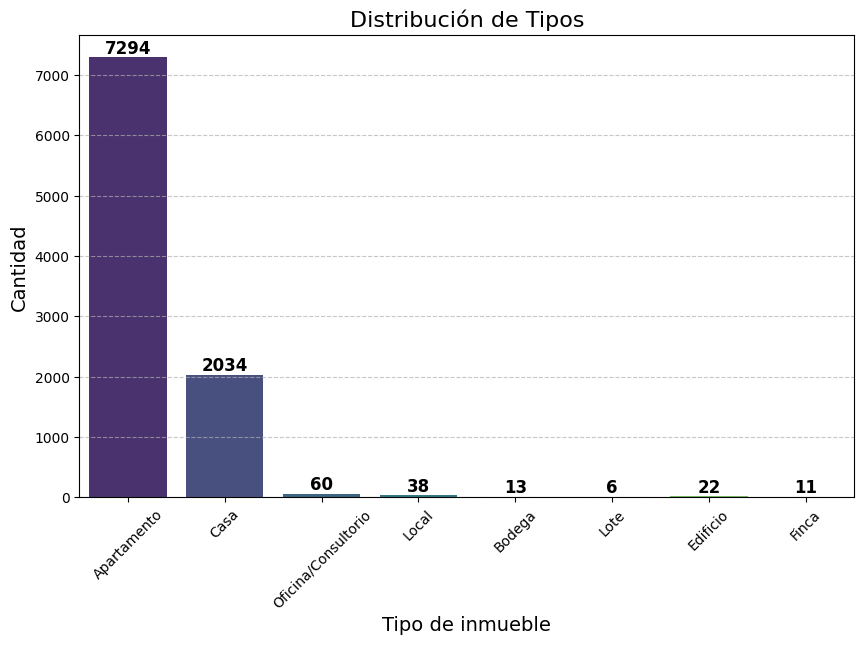

In [135]:

fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.countplot(x=df["Tipo"], palette="viridis")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Tipo de inmueble", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)
plt.title("Distribución de Tipos", fontsize=16)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [136]:
df[df['Área'] == df['Área'].max()]

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
7073,Casa,Casa en venta en Modelia,4,3,166243,Modelia,Fontibón,850000000.00


In [137]:
df[df['Habitaciones'] == df['Habitaciones'].max()]

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,480000000.00


In [138]:
df = df[df['Área'] < 10000]
df = df[df['Habitaciones'] < 15]


In [139]:
pd.set_option('display.float_format', '{:.2f}'.format)  

promedios = df.Valor.groupby(df["Tipo"]).mean()
promedios

Tipo
Apartamento            519406658.50
Bodega                 908000000.00
Casa                   823076147.52
Edificio              2343210526.32
Finca                 2410711342.55
Local                 1315703125.00
Lote                  1263333333.33
Oficina/Consultorio    944166898.31
Name: Valor, dtype: float64

C:\Users\Julian\AppData\Local\Temp\ipykernel_12156\1650327700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=promedios.index, y=promedios.values, palette="viridis")


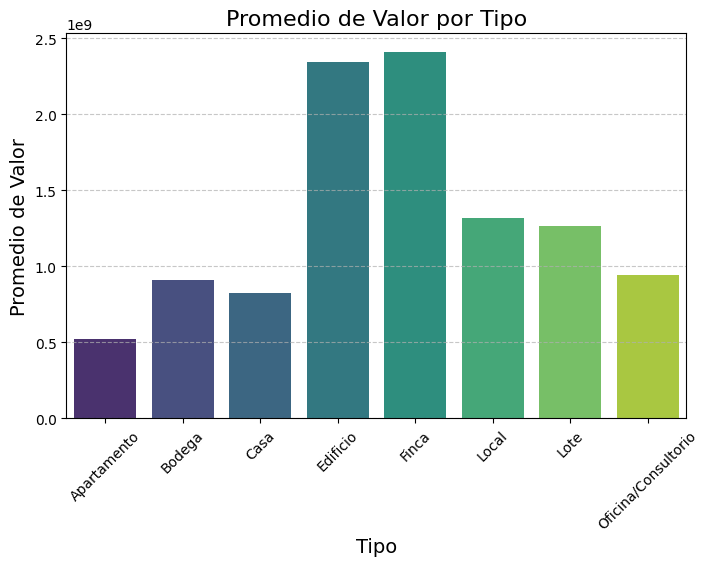

In [140]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=promedios.index, y=promedios.values, palette="viridis")

plt.xlabel("Tipo", fontsize=14)
plt.ylabel("Promedio de Valor", fontsize=14)
plt.title("Promedio de Valor por Tipo", fontsize=16)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [141]:
# Nos interesa solamente inmuebles para vivienda

df = df[(df['Tipo'] == 'Apartamento') | (df['Tipo'] == 'Casa')]

In [142]:
df.Valor.groupby(df["UPZ"]).mean().sort_values(ascending=False)[:10]

UPZ
La Candelaria                           1415606060.61
CHAPINERO: Chicó Lago + El Refugio      1232619978.10
Lucero                                  1137500000.00
Comuneros                                931666666.67
Casa Blanca Suba                         852500000.00
Ciudad Salitre Oriental                  782465517.24
USAQUÉN: Country Club + Santa Bárbara    744408906.33
CHAPINERO: Pardo Rubio + Chapinero       742545268.05
Los Cedros                               703476000.00
Ciudad Salitre Occidental                697392857.14
Name: Valor, dtype: float64

In [143]:
df.Valor.groupby(df["UPZ"]).median().sort_values(ascending=False)[:10]

UPZ
Lucero                                       1250000000.00
Casa Blanca Suba                              852500000.00
CHAPINERO: Chicó Lago + El Refugio            840000000.00
Comuneros                                     817500000.00
Ciudad Salitre Oriental                       680000000.00
Localidad Usme resto                          632500000.00
ENGATIVÁ: Santa Cecilia + Jardín  Botánico    608556813.00
La Floresta                                   600000000.00
Ciudad Jardín                                 575000000.00
Patio Bonito                                  550000000.00
Name: Valor, dtype: float64

C:\Users\Julian\AppData\Local\Temp\ipykernel_12156\3405946381.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=promedios_area.index, y=promedios_area.values, palette="viridis")


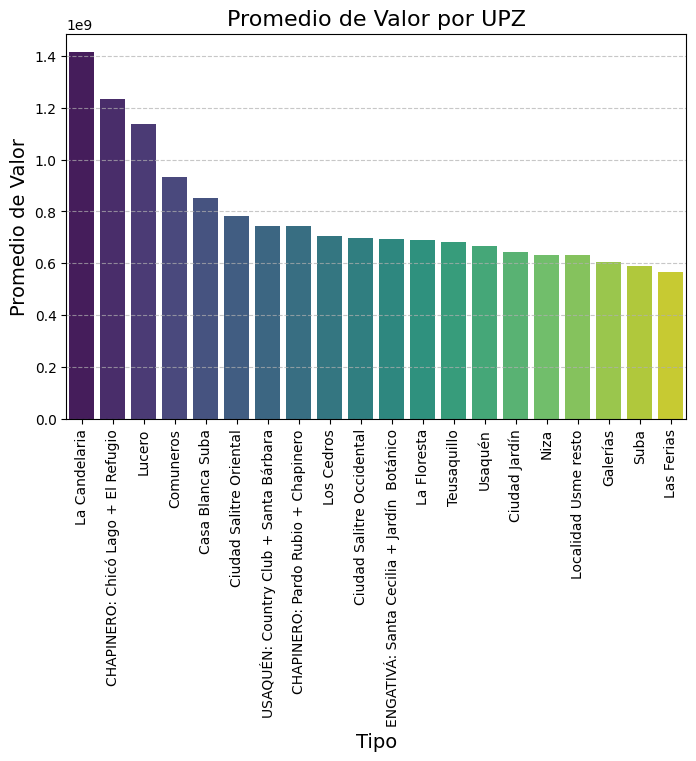

In [144]:
promedios_area = df.Valor.groupby(df["UPZ"]).mean().sort_values(ascending=False)[:20]
promedios_area

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=promedios_area.index, y=promedios_area.values, palette="viridis")

plt.xlabel("Tipo", fontsize=14)
plt.ylabel("Promedio de Valor", fontsize=14)
plt.title("Promedio de Valor por UPZ", fontsize=16)
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

C:\Users\Julian\AppData\Local\Temp\ipykernel_12156\1961504004.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=promedios_area_desc.index, y=promedios_area_desc.values, palette="viridis")


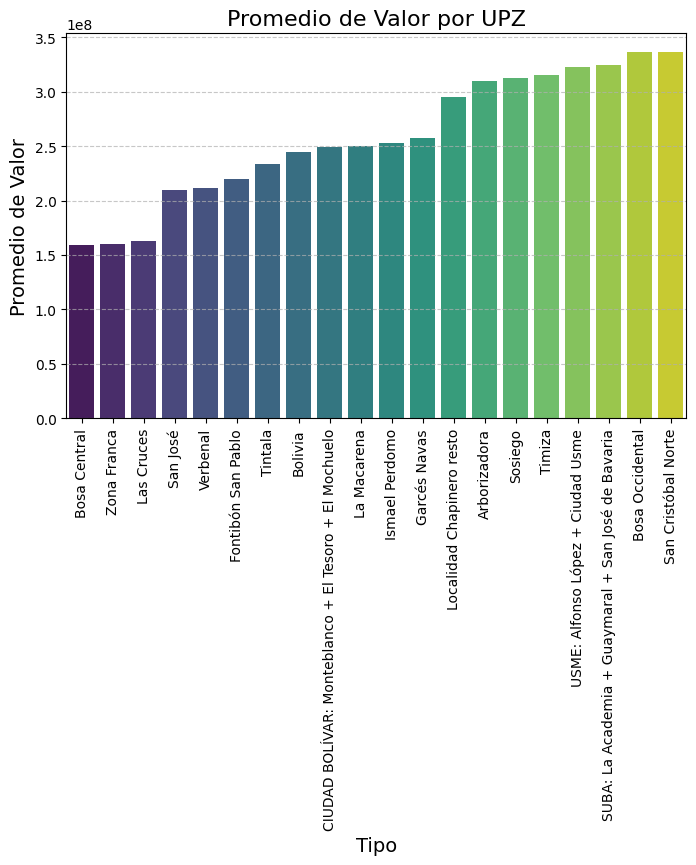

In [145]:
promedios_area_desc = df.Valor.groupby(df["UPZ"]).mean().sort_values(ascending=True)[:20]
promedios_area_desc

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=promedios_area_desc.index, y=promedios_area_desc.values, palette="viridis")

plt.xlabel("Tipo", fontsize=14)
plt.ylabel("Promedio de Valor", fontsize=14)
plt.title("Promedio de Valor por UPZ", fontsize=16)
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

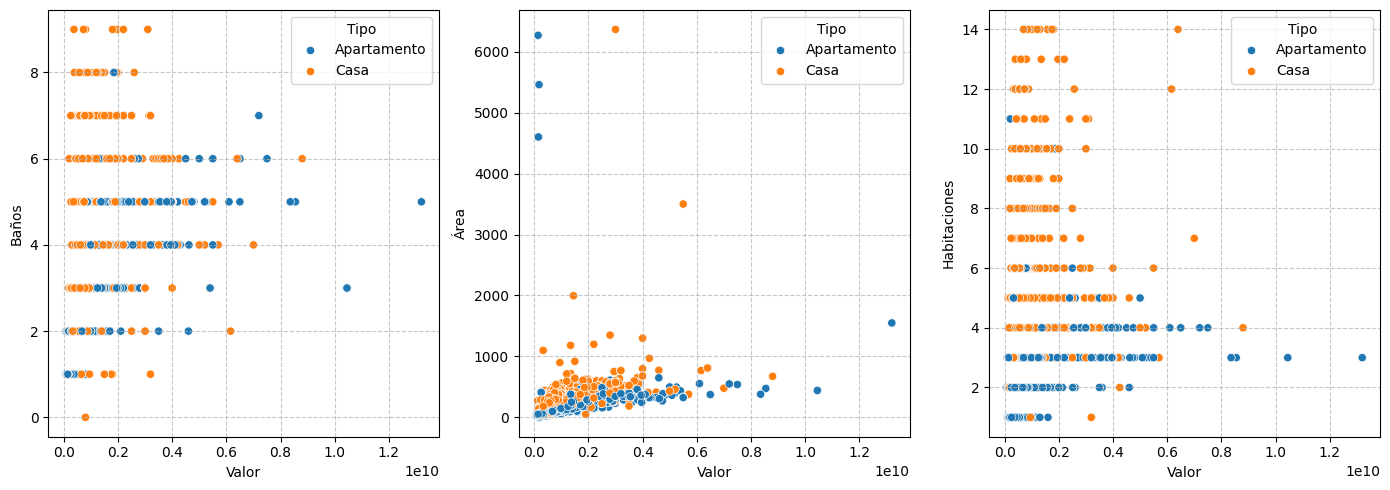

In [146]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

sns.scatterplot(x='Valor', y='Baños', data=df, ax=axes[0], hue='Tipo')
sns.scatterplot(x='Valor', y='Área', data=df, ax=axes[1], hue='Tipo')
sns.scatterplot(x='Valor', y='Habitaciones', data=df, ax=axes[2], hue='Tipo')

for ax in axes:
    ax.grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

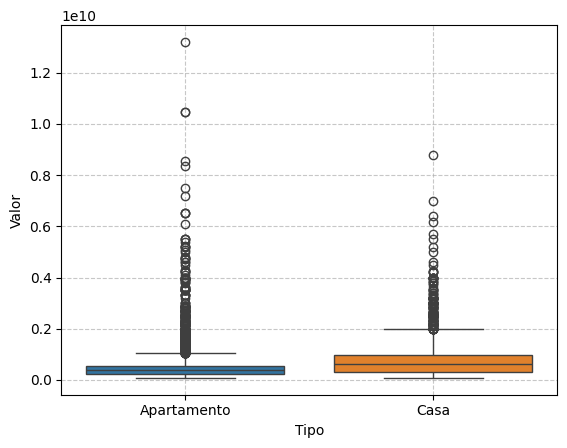

In [147]:
sns.boxplot(data=df, x = 'Tipo', y= 'Valor', hue='Tipo')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

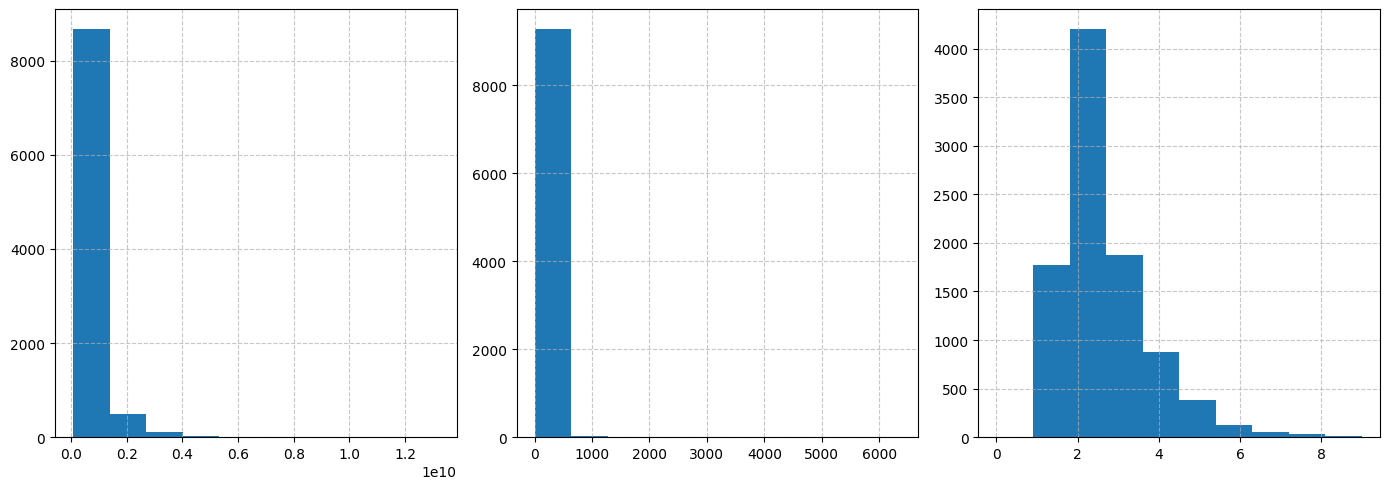

In [148]:
fig, ax = plt.subplots(1,3,figsize = (14,5))

ax[0].hist(df['Valor'])
ax[1].hist(df['Área'])
ax[2].hist(df['Baños'])

for axis in ax:
    axis.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Selección de características

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9311 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          9311 non-null   object 
 1   Descripcion   9311 non-null   object 
 2   Habitaciones  9311 non-null   int64  
 3   Baños         9311 non-null   int64  
 4   Área          9311 non-null   int64  
 5   Barrio        9311 non-null   object 
 6   UPZ           9311 non-null   object 
 7   Valor         9311 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 654.7+ KB


In [150]:
# Agrupemos por localidades (Hecho con IA generativa)

import pandas as pd

# Diccionario de mapeo
mapeo_localidades = {
    'CHAPINERO: Pardo Rubio + Chapinero': 'Chapinero',
    'KENNEDY: Castilla + Bavaria': 'Kennedy',
    'CHAPINERO: Chicó Lago + El Refugio': 'Chapinero',
    'Usaquén': 'Usaquén',
    'USAQUÉN: Country Club + Santa Bárbara': 'Usaquén',
    'Tintala': 'Kennedy',
    'Kennedy Central': 'Kennedy',
    'Teusaquillo': 'Teusaquillo',
    'El Prado': 'Usaquén',
    'Suba': 'Suba',
    'Los Andes': 'Chapinero',
    'Engativá': 'Engativá',
    'Fontibón': 'Fontibón',
    'Galerías': 'Barrios Unidos',
    'La Candelaria': 'La Candelaria',
    'Los Cedros': 'Usaquén',
    'La Alhambra': 'Usaquén',
    'SUBA: La Academia + Guaymaral + San José de Bavaria': 'Suba',
    'Niza': 'Suba',
    'Modelia': 'Fontibón',
    'Ciudad Salitre Oriental': 'Teusaquillo',
    'ENGATIVÁ: Santa Cecilia + Jardín  Botánico': 'Engativá',
    'CIUDAD BOLÍVAR: Monteblanco + El Tesoro + El Mochuelo': 'Ciudad Bolívar',
    'Bosa Central': 'Bosa',
    'Los Alcázares': 'Barrios Unidos',
    'San Cristóbal Norte': 'San Cristóbal',
    'PUENTE ARANDA: Zona Industrial + Puente Aranda': 'Puente Aranda',
    'USME: Alfonso López + Ciudad Usme': 'Usme',
    'Arborizadora': 'Ciudad Bolívar',
    'El Rincón': 'Suba',
    'SANTA FE: Las Nieves + Sagrado Corazón': 'Santa Fe',
    'Restrepo': 'Antonio Nariño',
    'Localidad Chapinero resto': 'Chapinero',
    'La Sabana': 'Los Mártires',
    'Ciudad Salitre Occidental': 'Fontibón',
    'Sosiego': 'San Cristóbal',
    'Boyacá Real': 'Engativá',
    'Timiza': 'Kennedy',
    'Quinta Paredes': 'Teusaquillo',
    'Garcés Navas': 'Engativá',
    'Britalia': 'Kennedy',
    'Ciudad Jardín': 'Antonio Nariño',
    'Santa Isabel': 'Los Mártires',
    'Las Ferias': 'Engativá',
    'Ismael Perdomo': 'Ciudad Bolívar',
    'Fontibón San Pablo': 'Fontibón',
    'Tunjuelito': 'Tunjuelito',
    'La Floresta': 'Suba',
    'Casa Blanca Suba': 'Suba',
    'La Macarena': 'Santa Fe',
    'Bolivia': 'Engativá',
    'Comuneros': 'San Cristóbal',
    'San José': 'San Cristóbal',
    'Minuto de Dios': 'Engativá',
    'Bosa Occidental': 'Bosa',
    'Venecia': 'Tunjuelito',
    'Localidad Usme resto': 'Usme',
    'Quiroga': 'Rafael Uribe Uribe',
    'Patio Bonito': 'Bosa',
    'Las Cruces': 'La Candelaria',
    'Zona Franca': 'Fontibón',
    'Lucero': 'Ciudad Bolívar',
    'Verbenal': 'Usaquén'
}

df['localidad'] = df['UPZ'].map(mapeo_localidades)

df.sample(5)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,localidad
8641,Casa,Casa en venta en Zona Noroccidental,4,4,550,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,2800000000.00,Chapinero
7660,Casa,Casa en venta en Suba,3,2,58,Suba,Suba,180000000.00,Suba
6885,Apartamento,Apartamento en venta en Suba,3,2,51,Suba,Suba,167000000.00,Suba
227,Apartamento,Apartamento en venta en Usaquén,3,1,54,Usaquén,Usaquén,190000000.00,Usaquén
8172,Apartamento,Apartamento en venta en Cedritos,3,4,130,Cedritos,Usaquén,570000000.00,Usaquén


In [151]:
# Dummizar variables Tipo

# df['Tipo'] = df['Tipo'].map({'Apartamento': 1, 'Casa': 0})
df.drop(['Descripcion','Barrio','UPZ'],axis=1,inplace=True)
df.head()

,Tipo,Habitaciones,Baños,Área,Valor,localidad
0,Apartamento,3,2,70,360000000.00,Chapinero
1,Casa,4,3,170,670000000.00,Kennedy
2,Apartamento,3,3,144,1120000000.00,Chapinero
3,Apartamento,3,2,154,890000000.00,Usaquén
4,Apartamento,2,3,128,970000000.00,Usaquén


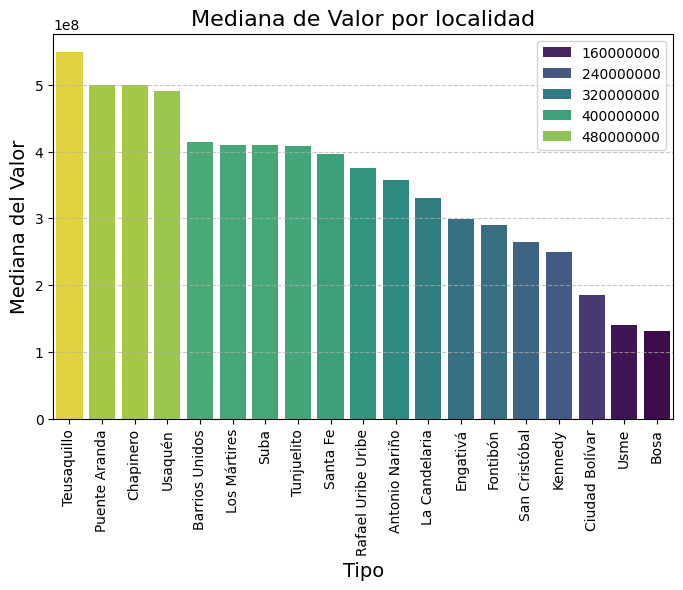

In [152]:
tabla = df.Valor.groupby(df['localidad']).median().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=tabla.index, y=tabla.values, palette="viridis", hue=tabla.values)

plt.xlabel("Tipo", fontsize=14)
plt.ylabel("Mediana del Valor", fontsize=14)
plt.title("Mediana de Valor por localidad", fontsize=16)
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

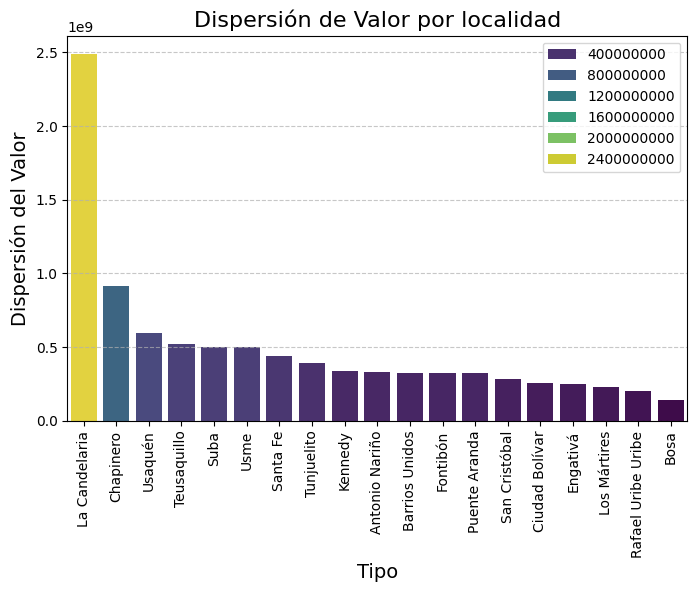

In [153]:
tabladi = df.Valor.groupby(df['localidad']).std().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=tabladi.index, y=tabladi.values, palette="viridis", hue=tabladi.values)

plt.xlabel("Tipo", fontsize=14)
plt.ylabel("Dispersión del Valor", fontsize=14)
plt.title("Dispersión de Valor por localidad", fontsize=16)
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show();

In [154]:
df.isna().sum()

Tipo            0
Habitaciones    0
Baños           0
Área            0
Valor           0
localidad       0
dtype: int64

In [ ]:
# ¿Qué hacer con las localidades?
# Probemos one-hot encoding

df_final = pd.get_dummies(df, columns=['localidad'], drop_first=True)
df_final

# Dummizar variable tipo

df_final['Tipo'] = df_final['Tipo'].map({'Apartamento': 1, 'Casa': 0})

In [158]:
df_final.head()

,Tipo,Habitaciones,Baños,Área,Valor,localidad_Barrios Unidos,localidad_Bosa,localidad_Chapinero,localidad_Ciudad Bolívar,localidad_Engativá,...,localidad_Los Mártires,localidad_Puente Aranda,localidad_Rafael Uribe Uribe,localidad_San Cristóbal,localidad_Santa Fe,localidad_Suba,localidad_Teusaquillo,localidad_Tunjuelito,localidad_Usaquén,localidad_Usme
0,1,3,2,70,360000000.00,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,4,3,170,670000000.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,3,3,144,1120000000.00,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,3,2,154,890000000.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1,2,3,128,970000000.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [159]:
df_final.iloc[:,:5].corr()

,Tipo,Habitaciones,Baños,Área,Valor
Tipo,1.00,-0.54,-0.40,-0.31,-0.19
Habitaciones,-0.54,1.00,0.58,0.36,0.24
Baños,-0.40,0.58,1.00,0.46,0.60
Área,-0.31,0.36,0.46,1.00,0.48
Valor,-0.19,0.24,0.60,0.48,1.00


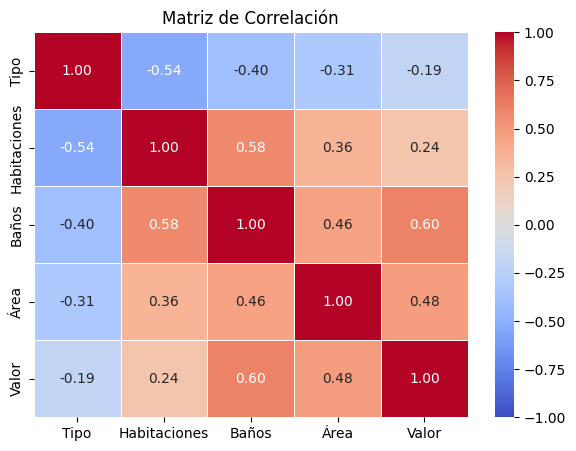

In [160]:
plt.figure(figsize=(7, 5))
sns.heatmap(df_final.iloc[:,:5].corr(), annot=True, fmt=".2f", cmap="coolwarm",  linewidths=0.5,vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()


### Modelos de regresión 

In [161]:
# Primer modelo

from sklearn.model_selection import train_test_split

X = df_final.iloc[:,:4] 
y = df_final['Valor']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # creo modelo
model.fit(X_train, y_train) # entreno el modelo
y_pred = model.predict(X_test) # Obtengo predicciones

X_test[:5], y_pred[:5]

(      Tipo  Habitaciones  Baños  Área
 8831     1             3      2    86
 134      1             3      2    71
 3592     1             3      3   144
 4503     1             3      2    98
 3174     1             3      4   234,
 array([4.18610000e+08, 4.04372286e+08, 8.03092180e+08, 4.30000172e+08,
        1.21794815e+09]))

In [163]:
print(model.intercept_)
print(model.coef_)

-111327256.0716716
[ 2.86651426e+07 -7.97389391e+07  3.29429684e+08  9.49180968e+05]


In [164]:
from sklearn.metrics import mean_squared_error, r2_score

# Métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'Raiz del MSE: {np.sqrt(mse)}')
print(f'R²: {r2:.4f}')

MSE: 241374512206563232.0000
Raiz del MSE: 491298801.348592
R²: 0.4598


In [166]:
# Segundo modelo

y = np.log(df_final['Valor'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

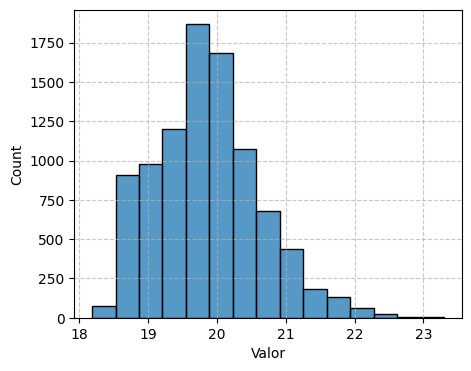

In [176]:
plt.figure(figsize=(5,4))
sns.histplot(y, bins='sturges')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

In [177]:
model = LinearRegression() # creo modelo
model.fit(X_train, y_train) # entreno el modelo
y_pred = model.predict(X_test) # Obtengo predicciones

X_test[:5], y_pred[:5]

(      Tipo  Habitaciones  Baños  Área
 8831     1             3      2    86
 134      1             3      2    71
 3592     1             3      3   144
 4503     1             3      2    98
 3174     1             3      4   234,
 array([19.62246653, 19.61286159, 20.17420301, 19.63015049, 20.74643004]))

In [178]:
print(model.intercept_)
print(model.coef_)

18.877698398607386
[ 0.01060972 -0.11670155  0.51459736  0.00064033]


In [179]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'Raiz del MSE: {np.sqrt(mse)}')
print(f'R²: {r2:.4f}')

MSE: 0.2372
Raiz del MSE: 0.48707106242915627
R²: 0.6058


In [183]:
# Tercer modelo

X = df_final.drop('Valor', axis= 1) 
# X['Habitaciones'] = X['Habitaciones']**2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
model = LinearRegression() # creo modelo
model.fit(X_train, y_train) # entreno el modelo
y_pred = model.predict(X_test) # Obtengo predicciones

In [185]:
print(model.intercept_)
print(model.coef_)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'Raiz del MSE: {np.sqrt(mse)}')
print(f'R²: {r2:.4f}')

18.868592008658496
[-0.05148538 -0.05489087  0.41483843  0.00058945 -0.15329542 -0.45751232
  0.28616842 -0.19394148 -0.07156302 -0.03838933 -0.13583581  0.42144996
  0.02272812 -0.01706144 -0.00525897 -0.06183057  0.2901357   0.08524103
  0.36278357 -0.27062204  0.275126   -0.40617676]
MSE: 0.1960
Raiz del MSE: 0.44268647165428376
R²: 0.6744
